In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(37) # 使得每次运行得到的随机数都一样

In [2]:
# 加载数据集
data_path='E:\PyProjects\DataSet\FireAI/data_hmm.txt'
df=pd.read_csv(data_path,header=None)
print(df.info()) # 查看数据信息，确保没有错误
print(df.head())
print(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 3 columns):
0    3312 non-null int64
1    3312 non-null int64
2    3312 non-null float64
dtypes: float64(1), int64(2)
memory usage: 77.7 KB
None
      0  1     2
0  1740  1  0.14
1  1740  2  0.14
2  1740  3  0.03
3  1740  4  0.07
4  1740  5  0.09
         0   1     2
3307  2015   8  5.03
3308  2015   9  5.11
3309  2015  10  5.16
3310  2015  11  5.07
3311  2015  12  5.11


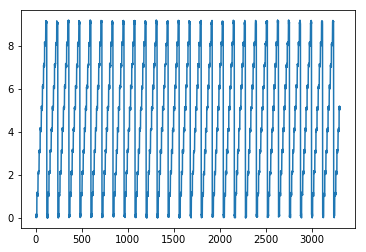

In [3]:
# 画出原始数据的走势图
df.iloc[:,2].plot()

In [4]:
dataset_X=df.iloc[:,2].values.reshape(1,-1).T # 前面两列是日期，用第2列作数据集
# 需要构建成二维数组形式，故而需要加上一个轴
print(dataset_X.shape) # 有3312个训练样本组成一列

# 建立HMM模型，并训练
from hmmlearn.hmm import GaussianHMM
model = GaussianHMM(n_components=4, covariance_type="diag", n_iter=1000)
model.fit(dataset_X)

(3312, 1)


GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=4, n_iter=1000, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [5]:
# 预测其状态
hidden_states=model.predict(dataset_X)


In [6]:
for i in range(model.n_components): # 打印出每个隐含状态
    mean=model.means_[i][0]
    variance=np.diag(model.covars_[i])[0]
    print('Hidden state: {}, Mean={:.3f}, Variance={:.3f}'
          .format((i+1),mean,variance))
    

Hidden state: 1, Mean=5.092, Variance=0.677
Hidden state: 2, Mean=2.601, Variance=0.257
Hidden state: 3, Mean=8.099, Variance=0.678
Hidden state: 4, Mean=0.600, Variance=0.254


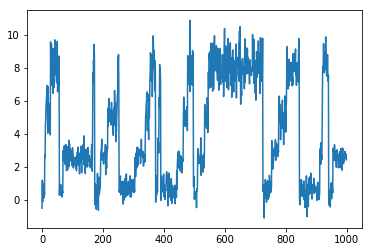

In [7]:
# 使用HMM模型生成数据
N=1000
samples,_=model.sample(N)
plt.plot(samples[:,0])

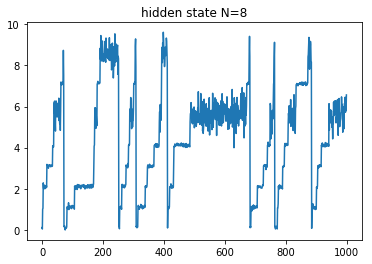

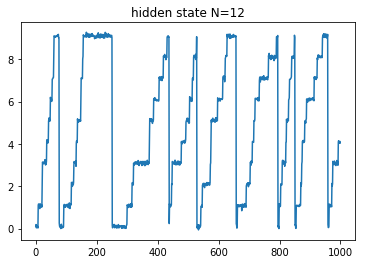

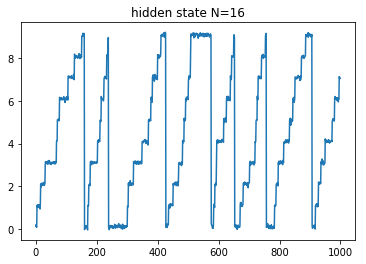

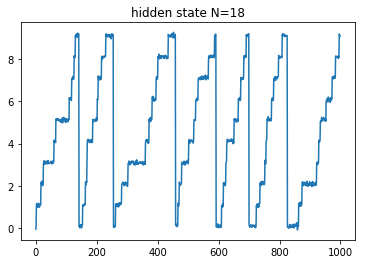

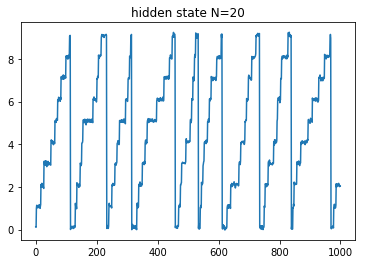

In [8]:
# 模型的提升，修改n_components

for i in [8,12,16,18,20]:
    model = GaussianHMM(n_components=i, covariance_type="diag", n_iter=1000)
    model.fit(dataset_X)
    samples,_=model.sample(1000)
    plt.plot(samples[:,0])
    plt.title('hidden state N={}'.format(i))
    plt.show()